In [87]:
import IPython.display as ipd
import random
import numpy as np
from visualization import wave_form, sound, label, model_perf
from preprocess import remove_shorter_waves, preprocess
from train import model, train
from test import record, test, predict

In [92]:
cd ASR

D:\Projects\ASR


In [93]:
sample_audio_path = 'Data/train/audio/yes/0a7c2a8d_nohash_0.wav'
sound(sample_audio_path)

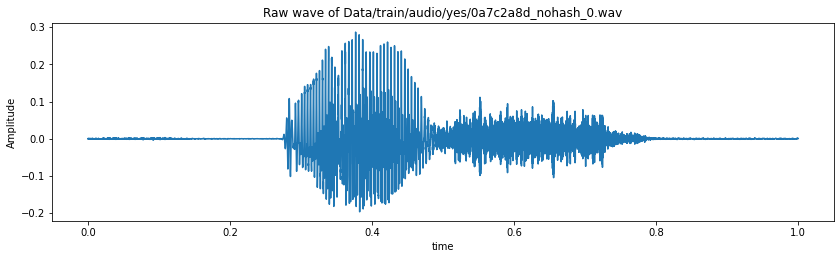

In [94]:
wave_form(sample_audio_path)

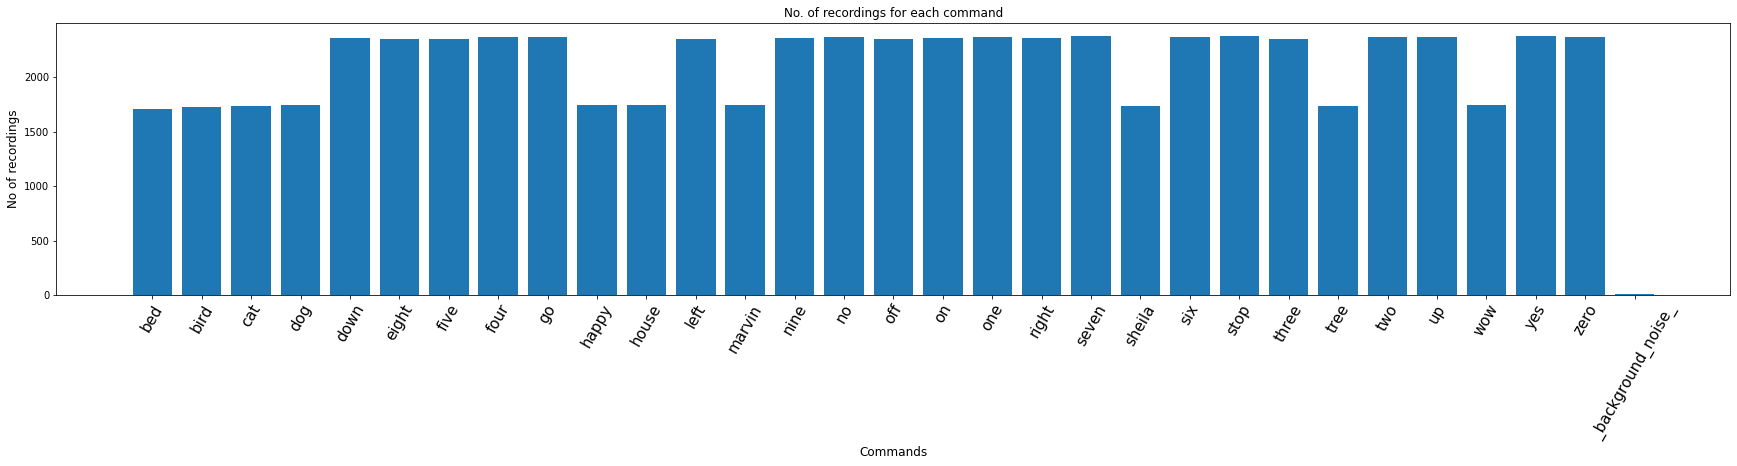

In [95]:
dir = 'Data/train/audio/'
labels = label(dir)

In [96]:
labels

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

# Pre-process

In [8]:
all_wave, all_label = remove_shorter_waves(labels, dir)

yes
no
up
down
left
right
on
off
stop
go


In [49]:
[x_tr, x_val, y_tr, y_val], classes = preprocess(all_label, all_wave, labels)

In [10]:
model = model(labels)
model,history = train(model, x_tr, x_val, y_tr, y_val)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                         

533/533 [==============================] - 65s 121ms/step - loss: 0.4773 - accuracy: 0.8305 - val_loss: 0.5132 - val_accuracy: 0.8283
Epoch 18/100
533/533 [==============================] - 65s 122ms/step - loss: 0.4524 - accuracy: 0.8436 - val_loss: 0.5419 - val_accuracy: 0.8229
Epoch 19/100
533/533 [==============================] - 63s 119ms/step - loss: 0.4480 - accuracy: 0.8427 - val_loss: 0.5107 - val_accuracy: 0.8302
Epoch 20/100
533/533 [==============================] - 63s 119ms/step - loss: 0.4234 - accuracy: 0.8511 - val_loss: 0.5480 - val_accuracy: 0.8161
Epoch 21/100
533/533 [==============================] - 64s 119ms/step - loss: 0.4144 - accuracy: 0.8554 - val_loss: 0.5082 - val_accuracy: 0.8311
Epoch 22/100
533/533 [==============================] - 63s 118ms/step - loss: 0.4033 - accuracy: 0.8561 - val_loss: 0.5425 - val_accuracy: 0.8238
Epoch 23/100
533/533 [==============================] - 63s 118ms/step - loss: 0.3980 - accuracy: 0.8619 - val_loss: 0.4876 - val_a

533/533 [==============================] - 63s 118ms/step - loss: 0.2797 - accuracy: 0.9033 - val_loss: 0.5045 - val_accuracy: 0.8374
Epoch 44/100
533/533 [==============================] - 63s 118ms/step - loss: 0.2821 - accuracy: 0.9021 - val_loss: 0.4670 - val_accuracy: 0.8501
Epoch 45/100
533/533 [==============================] - 64s 121ms/step - loss: 0.2622 - accuracy: 0.9108 - val_loss: 0.5012 - val_accuracy: 0.8438
Epoch 46/100
533/533 [==============================] - 67s 125ms/step - loss: 0.2708 - accuracy: 0.9065 - val_loss: 0.5128 - val_accuracy: 0.8412
Epoch 47/100
533/533 [==============================] - 76s 143ms/step - loss: 0.2706 - accuracy: 0.9095 - val_loss: 0.5548 - val_accuracy: 0.8356
Epoch 48/100
533/533 [==============================] - 69s 129ms/step - loss: 0.2608 - accuracy: 0.9111 - val_loss: 0.4961 - val_accuracy: 0.8407
Epoch 49/100
533/533 [==============================] - 65s 122ms/step - loss: 0.2574 - accuracy: 0.9116 - val_loss: 0.4720 - val_a

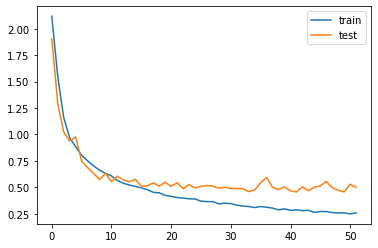

In [11]:
model_perf(history)

# Test

### Test on test set

In [63]:
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(classes, model, samples))

Audio: left
Text: left


### Test on input audio

In [84]:
record()
test(classes, model)

start
end


'no'

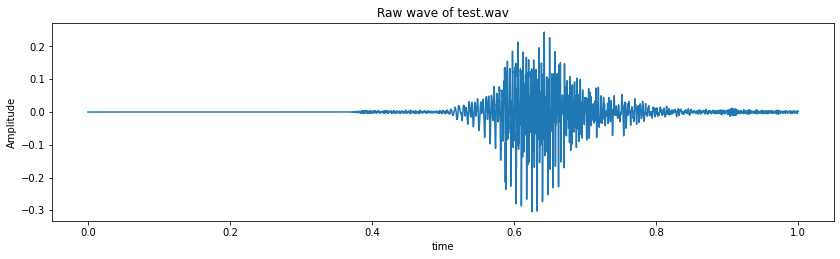

In [85]:
wave_form('test.wav')

In [86]:
test_audio_path = 'test.wav'
sound(test_audio_path)